In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from sklearn.metrics import r2_score as r2, mean_squared_error as mse
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

#### Загрузка данных

In [2]:
data = pd.read_csv('train.csv')

#### Просмотр данных

In [3]:
data.head().T

,0,1,2,3,4
Id,14038,15053,4765,5809,10783
DistrictId,35,41,53,58,99
Rooms,2,3,2,2,1
Square,47.9816,65.6836,44.948,53.353,39.6492
LifeSquare,29.4428,40.0495,29.1976,52.7315,23.7762
KitchenSquare,6,8,0,9,7
Floor,7,7,8,8,11
HouseFloor,9,9,12,17,12
HouseYear,1969,1978,1968,1977,1976
Ecology_1,0.0890397,6.99893e-05,0.0496373,0.437885,0.0123389


#### Описание данных

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,10000.0,8383.407700,4859.019020,0.000000,4169.500000,8394.500000,12592.500000,1.679800e+04
DistrictId,10000.0,50.400800,43.587592,0.000000,20.000000,36.000000,75.000000,2.090000e+02
Rooms,10000.0,1.890500,0.839512,0.000000,1.000000,2.000000,2.000000,1.900000e+01
Square,10000.0,56.315775,21.058732,1.136859,41.774881,52.513310,65.900625,6.410652e+02
LifeSquare,7887.0,37.199645,86.241209,0.370619,22.769832,32.781260,45.128803,7.480592e+03
KitchenSquare,10000.0,6.273300,28.560917,0.000000,1.000000,6.000000,9.000000,2.014000e+03
Floor,10000.0,8.526700,5.241148,1.000000,4.000000,7.000000,12.000000,4.200000e+01
HouseFloor,10000.0,12.609400,6.775974,0.000000,9.000000,13.000000,17.000000,1.170000e+02
HouseYear,10000.0,3990.166300,200500.261427,1910.000000,1974.000000,1977.000000,2001.000000,2.005201e+07
Ecology_1,10000.0,0.118858,0.119025,0.000000,0.017647,0.075424,0.195781,5.218671e-01


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [6]:
data.shape

(10000, 20)

Признаки Healthcare_1 и LifeSquare содержат неполные данные. Признаки Ecology_2, Ecology_3, Shops_2 являются бинарными, но не числовыми. Позднее решим обработать их или не включать в модель. Посмотрим на HealthCare_1.

In [7]:
data.corr()['Healthcare_1'].sort_values()

HouseFloor      -0.143973
Floor           -0.138294
Ecology_1       -0.043547
Square          -0.039748
LifeSquare      -0.026867
HouseYear       -0.011969
Id              -0.003879
KitchenSquare    0.009472
Rooms            0.042857
Social_2         0.050458
Shops_1          0.057758
Social_1         0.077133
Social_3         0.133877
Price            0.138755
Helthcare_2      0.203177
DistrictId       0.304335
Healthcare_1     1.000000
Name: Healthcare_1, dtype: float64

Удаляем.

In [8]:
data = data.drop(['Healthcare_1'], axis = 1)

In [9]:
data.corr()['LifeSquare'].sort_values()

Social_1        -0.048363
Social_2        -0.039283
Helthcare_2     -0.024762
Ecology_1       -0.023629
DistrictId      -0.019910
Shops_1         -0.007569
HouseYear       -0.002210
KitchenSquare   -0.001195
Social_3         0.012763
Id               0.018449
Floor            0.024559
HouseFloor       0.027442
Price            0.081292
Rooms            0.131336
Square           0.196129
LifeSquare       1.000000
Name: LifeSquare, dtype: float64

Туда же.

In [10]:
data = data.drop(['LifeSquare'], axis = 1)

##### HouseYear

In [11]:
np.sort(data.HouseYear.unique())

array([    1910,     1912,     1914,     1916,     1917,     1918,
           1919,     1928,     1929,     1930,     1931,     1932,
           1933,     1934,     1935,     1936,     1937,     1938,
           1939,     1940,     1941,     1942,     1947,     1948,
           1950,     1951,     1952,     1953,     1954,     1955,
           1956,     1957,     1958,     1959,     1960,     1961,
           1962,     1963,     1964,     1965,     1966,     1967,
           1968,     1969,     1970,     1971,     1972,     1973,
           1974,     1975,     1976,     1977,     1978,     1979,
           1980,     1981,     1982,     1983,     1984,     1985,
           1986,     1987,     1988,     1989,     1990,     1991,
           1992,     1993,     1994,     1995,     1996,     1997,
           1998,     1999,     2000,     2001,     2002,     2003,
           2004,     2005,     2006,     2007,     2008,     2009,
           2010,     2011,     2012,     2013,     2014,     2

Наблюдается 3 выбраса: 1) 2020г. еще не наступил; 2) 20052011 - ошибка; 3) 4968 - ошибка. Допустим, что застройщики поголовно честные, глобальный потрясений не ожидается и цены неволатильны. В этом случае 2020г. оставим как есть. Посмотрим на число наблюдений по 2-му и 3-му выбросам.

In [12]:
data.loc[data['HouseYear']>2020]

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1497,10814,109,1.0,37.265070,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,3,6,B,254084.534396
4189,11607,147,2.0,44.791836,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,5,8,B,243028.603096


Всего 2. 20052011 явно диапазон между 2005 и 2011 гг. Заменим на срединное значение, т.е. на 2008г. 4968 явно ошибка в написании года. Заменим на 1968.

In [13]:
def chng_house_yr(df):
    df.loc[data['HouseYear']==20052011,'HouseYear']=2008
    df.loc[data['HouseYear']==4968,'HouseYear']=1968
    return df

In [14]:
data=chng_house_yr(data)

Проверим.

In [15]:
np.sort(data.HouseYear.unique())

array([1910, 1912, 1914, 1916, 1917, 1918, 1919, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
       1947, 1948, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958,
       1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
       1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

Выбросы исправлены.

##### Rooms

Оценим визуально поведение признака Rooms.

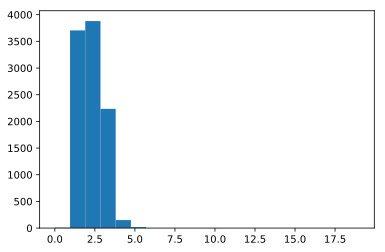

In [16]:
plt.hist(data['Rooms'], bins=20);

Посчитаем и посмотрим детальнее.

In [17]:
data.Rooms.value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

Безкомнатные (студии?), 10-, 19- и 6-комнатные. Примечательно, что они малы числом. По этому критерию к выбросу была отнесена и 6-комнатная квартира. Посмотрим на них более пристально.

In [18]:
data.loc[(data['Rooms'] > 5) | (data['Rooms'] < 1), ['Id','Rooms', 'Square', 'KitchenSquare', 'HouseYear', 'Price']]

,Id,Rooms,Square,KitchenSquare,HouseYear,Price
377,5927,10.0,59.056975,10.0,2002,317265.323792
1397,12638,0.0,138.427694,0.0,2016,268394.744389
1454,8491,19.0,42.006046,7.0,2014,78364.616704
1981,7917,0.0,212.932361,0.0,2008,302211.260887
2170,14003,6.0,59.414334,6.0,1969,229661.964416
2269,7317,0.0,41.790881,0.0,1977,98129.976788
3911,770,0.0,49.483501,0.0,2015,217009.338463
4366,456,0.0,81.491446,0.0,1977,212864.799112
4853,3224,0.0,2.377248,0.0,1977,126596.941798
6149,3159,0.0,38.697117,9.0,1982,158998.110646


Беглый взгляд на данные показывает, что значения признака Rooms меньше 1 и больше 5 являются выбросами и их нужно корректировать. Сделаем частично руками для надежности.

In [19]:
data.loc[data['Id'].isin([5927, 14003, 14865]), 'Rooms'] = 2
data.loc[data['Id'] == 8491, 'Rooms'] = 1
data.loc[data['Id'].isin([3224, 3159, 7317]), 'Rooms'] = 1
data.loc[data['Id'].isin([770]), 'Rooms'] = 2
data.loc[data['Id'].isin([456, 9443]), 'Rooms'] = 3
data.loc[data['Id'].isin([12638]), 'Rooms'] = 4
data.loc[data['Id'].isin([7917]), 'Rooms'] = 5

In [20]:
data.loc[(data['Rooms'] > 5) | (data['Rooms'] < 1), ['Id','Rooms', 'Square', 'KitchenSquare', 'HouseYear', 'Price']]

,Id,Rooms,Square,KitchenSquare,HouseYear,Price


##### Square & KitchenSquare

Оценим визуально поведение признака Square

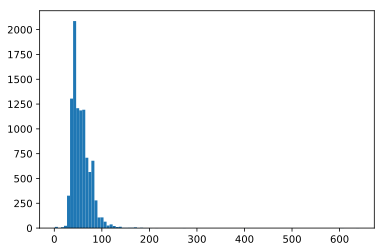

In [21]:
plt.hist(data['Square'], bins=100);

Есть выбросы. Примем за гипотезу, что признак Square варьируется от 30м2 до 200м2. Все остьальное - анамалии.

Посмотрим на медианы относительно количества комнат

In [22]:
data[['Square', 'Rooms']].groupby('Rooms').median().T

Rooms,1.0,2.0,3.0,4.0,5.0
Square,40.40659,55.850302,77.421742,98.686703,117.855969


In [23]:
data[['KitchenSquare', 'Rooms']].groupby('Rooms').median().T

Rooms,1.0,2.0,3.0,4.0,5.0
KitchenSquare,6.0,6.0,7.0,9.0,9.0


Выглядят нормально.

In [24]:
data.loc[data['Square'] > 200, ['Id', 'Rooms', 'Square', 'KitchenSquare', 'Price']]

,Id,Rooms,Square,KitchenSquare,Price
1981,7917,5.0,212.932361,0.0,302211.260887
1982,5548,5.0,275.645284,26.0,455264.882666
4262,28,2.0,604.705972,1.0,187717.242538
4690,2307,1.0,409.425181,10.0,90470.430830
6977,11602,2.0,641.065193,10.0,133529.681562
9910,16568,4.0,200.334539,25.0,528560.506016


In [25]:
data.loc[data['Id'].isin([28, 2307, 11602]), ['Square']] = data.loc[data['Id'].isin([28, 2307, 11602]), ['Square']] / 10
data.loc[data['Id'].isin([7917, 5548]), ['KitchenSquare']] = 20
data.loc[data['Id'].isin([28, 2307, 11602, 16568]), ['KitchenSquare']] = 10
data.loc[data['Id'].isin([7917, 5548, 28, 2307, 11602])]

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1981,7917,27,5.0,212.932361,20.0,2,3.0,2008,0.211401,B,B,9,1892,0,0,1,B,302211.260887
1982,5548,86,5.0,275.645284,20.0,12,37.0,2011,0.161976,B,A,31,7010,5,3,7,B,455264.882666
4262,28,9,2.0,60.470597,10.0,17,18.0,1977,0.161532,B,B,25,5648,1,2,4,B,187717.242538
4690,2307,102,1.0,40.942518,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,3,6,B,90470.430830
6977,11602,30,2.0,64.106519,10.0,20,19.0,2019,0.000078,B,B,22,6398,141,3,23,B,133529.681562


In [26]:
data = data.drop(data.loc[data['Square'] < 15, :].index)
data.shape

(9987, 18)

Убрали незначительный срез маленьких и странных квартир.

In [27]:
data[data['KitchenSquare'] > data['Square']]

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1064,14656,62,1.0,47.100719,2014.0,4,1.0,2014,0.072158,B,B,2,629,1,0,0,A,108337.484207
5149,13703,42,1.0,38.071692,73.0,9,10.0,2006,0.158249,B,B,21,5731,0,1,0,B,160488.033165
7088,6569,27,1.0,38.220258,84.0,4,17.0,2018,0.011654,B,B,4,915,0,0,0,B,99079.960518
8584,14679,81,1.0,32.276663,1970.0,6,1.0,1977,0.006076,B,B,30,5285,0,6,6,B,105539.556275


In [28]:
kitchen_index = data[data['KitchenSquare'] > data['Square']].index
kitchen_index
data.loc[kitchen_index, 'KitchenSquare'] = round(data['KitchenSquare'].median())

#### Floor & HouseFloor 

In [29]:
data.loc[data['HouseFloor'] > 50]

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
6131,10806,5,1.0,51.944587,1.0,6,99.0,1977,0.150818,B,B,16,3433,4,4,5,B,296127.115515
8599,9300,74,2.0,71.747869,9.0,5,99.0,1977,0.075779,B,B,6,1437,3,0,2,B,243329.912579
8854,78,30,2.0,65.773749,1.0,8,117.0,1977,0.000078,B,B,22,6398,141,3,23,B,207248.370520


Выявили наиболее странные анамалии.

In [30]:
data.loc[data['HouseFloor'] == 99, 'HouseFloor'] = 9
data.loc[data['HouseFloor'] == 117, 'HouseFloor'] = 17

Поменяем местами этажность дома и номер этажа для всех Id, где они несоответвтуют.

In [31]:
floors_index = data[data['HouseFloor'] < data['Floor']].index
data.loc[floors_index, 'Floor'], data.loc[floors_index, 'HouseFloor'] = data.loc[floors_index, 'HouseFloor'], data.loc[floors_index, 'Floor']

Разберемся с категориальными признаками и целочисленными значениями.

In [32]:
def category_prep(df, cat_feats=['Ecology_2', 'Ecology_3', 'Shops_2']):
    df_copy = df.copy()
    for col in cat_feats:
        df_copy.loc[:, col] = df[col].map({'A': 1, 'B': 0})
    return df_copy

In [33]:
def int_prep(df, cat_feats=['Rooms', 'KitchenSquare', 'Floor', 'HouseFloor']):
    df_copy = df.copy()
    for col in cat_feats:
        df_copy.loc[:, col] = df[col].astype(int)
    return df_copy

Добавим характеристик и функций.

In [34]:
def add_mean_prices(df):
    df_out = df.copy()
    
    stats_flt_by_dist_rooms = df.groupby(['DistrictId', 'Rooms'], as_index=False)[['Price']]\
                                                                .mean().rename(columns={'Price':'mean_price_dist_rooms'})
    
    stats_flt_by_rooms = data.groupby(['Rooms'], as_index=False)[['Price']].mean().rename(columns={'Price':'mean_price_rooms'})

    
    data['Price_m2']= data['Price']/data['Square']
    stats_sqm_by_dist = data.groupby(['DistrictId'], as_index=False)[['Price_m2']]\
                                                                .mean().rename(columns={'Price_m2':'mean_price_m2'})
    mean_price = data['Price'].mean()
    
    df_out = pd.merge(df_out, stats_flt_by_dist_rooms, on=['DistrictId', 'Rooms'], how='left')
    df_out = pd.merge(df_out, stats_flt_by_rooms, on='Rooms', how='left')
    df_out = pd.merge(df_out, stats_sqm_by_dist, on='DistrictId', how='left')
    
    df_out['mean_price_rooms'] = df_out['mean_price_rooms'].fillna(mean_price)
    df_out['mean_price_m2'] = df_out['mean_price_m2'].fillna(df_out['mean_price_rooms'])
    df_out['mean_price_dist_rooms'] = df_out['mean_price_dist_rooms'].fillna(df_out['mean_price_rooms'])
   
    return df_out

In [35]:
def prepare_data(df):
    df = category_prep(df)
    df = add_mean_prices(df)
    df = df.astype("float32")
    return df

##### Готовим данные

In [36]:
train, valid = train_test_split(data, test_size=0.20, random_state=42)

In [37]:
train.shape, valid.shape

((7989, 18), (1998, 18))

##### Работаем с сетами

In [38]:
train = prepare_data(train)

In [39]:
valid = prepare_data(valid)

In [40]:
train.shape, valid.shape

((7989, 21), (1998, 21))

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7989 entries, 0 to 7988
Data columns (total 21 columns):
Id                       7989 non-null float32
DistrictId               7989 non-null float32
Rooms                    7989 non-null float32
Square                   7989 non-null float32
KitchenSquare            7989 non-null float32
Floor                    7989 non-null float32
HouseFloor               7989 non-null float32
HouseYear                7989 non-null float32
Ecology_1                7989 non-null float32
Ecology_2                7989 non-null float32
Ecology_3                7989 non-null float32
Social_1                 7989 non-null float32
Social_2                 7989 non-null float32
Social_3                 7989 non-null float32
Helthcare_2              7989 non-null float32
Shops_1                  7989 non-null float32
Shops_2                  7989 non-null float32
Price                    7989 non-null float32
mean_price_dist_rooms    7989 non-null float32


##### Модель

In [42]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1998 entries, 0 to 1997
Data columns (total 21 columns):
Id                       1998 non-null float32
DistrictId               1998 non-null float32
Rooms                    1998 non-null float32
Square                   1998 non-null float32
KitchenSquare            1998 non-null float32
Floor                    1998 non-null float32
HouseFloor               1998 non-null float32
HouseYear                1998 non-null float32
Ecology_1                1998 non-null float32
Ecology_2                1998 non-null float32
Ecology_3                1998 non-null float32
Social_1                 1998 non-null float32
Social_2                 1998 non-null float32
Social_3                 1998 non-null float32
Helthcare_2              1998 non-null float32
Shops_1                  1998 non-null float32
Shops_2                  1998 non-null float32
Price                    1998 non-null float32
mean_price_dist_rooms    1998 non-null float32


In [43]:
train.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'KitchenSquare', 'Floor',
       'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3',
       'Social_1', 'Social_2', 'Social_3', 'Helthcare_2', 'Shops_1', 'Shops_2',
       'Price', 'mean_price_dist_rooms', 'mean_price_rooms', 'mean_price_m2'],
      dtype='object')

In [44]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,7989.0,8399.326172,4845.725098,2.000000,4175.000000,8417.000000,12590.000000,16798.000000
DistrictId,7989.0,51.025410,43.943546,0.000000,21.000000,37.000000,77.000000,209.000000
Rooms,7989.0,1.891100,0.815247,1.000000,1.000000,2.000000,2.000000,5.000000
Square,7989.0,56.354069,19.242214,16.117155,41.745152,52.712196,66.123016,275.645294
KitchenSquare,7989.0,5.862311,4.986586,0.000000,1.000000,6.000000,9.000000,123.000000
Floor,7989.0,7.720741,5.298770,0.000000,4.000000,7.000000,11.000000,42.000000
HouseFloor,7989.0,13.443234,5.888748,1.000000,9.000000,14.000000,17.000000,48.000000
HouseYear,7989.0,1984.955078,18.445230,1912.000000,1974.000000,1977.000000,2001.000000,2020.000000
Ecology_1,7989.0,0.118600,0.118691,0.000000,0.017647,0.075424,0.195781,0.521867
Ecology_2,7989.0,0.009138,0.095161,0.000000,0.000000,0.000000,0.000000,1.000000


In [45]:
feats = ['DistrictId', 'Rooms', 'Square', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3',
       'Helthcare_2', 'Shops_1', 'Shops_2']

In [46]:
train.loc[:, feats].describe().T

,count,mean,std,min,25%,50%,75%,max
DistrictId,7989.0,51.025410,43.943546,0.000000,21.000000,37.000000,77.000000,209.000000
Rooms,7989.0,1.891100,0.815247,1.000000,1.000000,2.000000,2.000000,5.000000
Square,7989.0,56.354069,19.242214,16.117155,41.745152,52.712196,66.123016,275.645294
KitchenSquare,7989.0,5.862311,4.986586,0.000000,1.000000,6.000000,9.000000,123.000000
Floor,7989.0,7.720741,5.298770,0.000000,4.000000,7.000000,11.000000,42.000000
HouseFloor,7989.0,13.443234,5.888748,1.000000,9.000000,14.000000,17.000000,48.000000
HouseYear,7989.0,1984.955078,18.445230,1912.000000,1974.000000,1977.000000,2001.000000,2020.000000
Ecology_1,7989.0,0.118600,0.118691,0.000000,0.017647,0.075424,0.195781,0.521867
Ecology_2,7989.0,0.009138,0.095161,0.000000,0.000000,0.000000,0.000000,1.000000
Ecology_3,7989.0,0.026787,0.161469,0.000000,0.000000,0.000000,0.000000,1.000000


In [47]:
model = RF(n_estimators=999,
    max_features=7,
    max_depth=50,
    random_state=42)

In [48]:
train.loc[:, feats].describe().T

,count,mean,std,min,25%,50%,75%,max
DistrictId,7989.0,51.025410,43.943546,0.000000,21.000000,37.000000,77.000000,209.000000
Rooms,7989.0,1.891100,0.815247,1.000000,1.000000,2.000000,2.000000,5.000000
Square,7989.0,56.354069,19.242214,16.117155,41.745152,52.712196,66.123016,275.645294
KitchenSquare,7989.0,5.862311,4.986586,0.000000,1.000000,6.000000,9.000000,123.000000
Floor,7989.0,7.720741,5.298770,0.000000,4.000000,7.000000,11.000000,42.000000
HouseFloor,7989.0,13.443234,5.888748,1.000000,9.000000,14.000000,17.000000,48.000000
HouseYear,7989.0,1984.955078,18.445230,1912.000000,1974.000000,1977.000000,2001.000000,2020.000000
Ecology_1,7989.0,0.118600,0.118691,0.000000,0.017647,0.075424,0.195781,0.521867
Ecology_2,7989.0,0.009138,0.095161,0.000000,0.000000,0.000000,0.000000,1.000000
Ecology_3,7989.0,0.026787,0.161469,0.000000,0.000000,0.000000,0.000000,1.000000


In [49]:
model.fit(train.loc[:, feats], train['Price'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features=7, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=999, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [50]:
pred_train = model.predict(train.loc[:, feats])

In [51]:
pred_valid = model.predict(valid.loc[:, feats])

##### Оценка

In [52]:
r2(train['Price'], pred_train)

0.9661761323238865

In [53]:
r2(valid['Price'], pred_valid)

0.7354325619611108

##### Грузимся

In [54]:
test = pd.read_csv('test.csv')

In [55]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB


In [56]:
test = test.drop(['Healthcare_1'], axis = 1)
test = test.drop(['LifeSquare'], axis = 1)

In [57]:
test.loc[test['Rooms'] > 5, ['Id','Rooms', 'Square', 'KitchenSquare', 'HouseYear']]

,Id,Rooms,Square,KitchenSquare,HouseYear
2071,10793,6.0,110.750226,0.0,2015
3217,4058,6.0,223.453689,16.0,2017
3398,1435,17.0,52.866107,8.0,1987


In [58]:
test.loc[test['Rooms'] < 1, ['Id','Rooms','Square', 'KitchenSquare']].sort_values(['Square'])

,Id,Rooms,Square,KitchenSquare
2524,10729,0.0,76.345154,12.0
2406,3343,0.0,116.824201,0.0


In [59]:
test.loc[test['Id']== 10729, 'Rooms'] = 3
test.loc[test['Id'] == 3343, 'Rooms'] = 5

In [60]:
test.loc[test['Square'] > 200, ['Id', 'Rooms', 'Square', 'KitchenSquare']]

,Id,Rooms,Square,KitchenSquare
3217,4058,6.0,223.453689,16.0
3909,1397,3.0,221.138768,4.0


In [61]:
test.loc[test['Square'] < 15, ['Id', 'Rooms', 'Square', 'KitchenSquare']]
sq_ind = test.loc[test['Square'] < 15, :].index
test.loc[sq_ind, 'Square'] = test.loc[sq_ind, 'Square']*10

In [62]:
test[test['KitchenSquare'] > test['Square']]

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
1964,14594,11,2.0,42.795304,620.0,11,14.0,1972,0.038693,B,B,28,6533,1,2,5,B
2424,10662,29,1.0,25.956829,33.0,5,5.0,1973,0.069660,B,B,31,6119,4,1,2,B
3863,3194,29,2.0,43.926987,44.0,6,5.0,1964,0.086885,B,B,10,2277,2,0,0,B
4555,12640,6,2.0,54.629142,97.0,4,17.0,2015,0.243205,B,B,5,1564,0,0,0,B


In [63]:
kitchen_index = test[test['KitchenSquare'] > test['Square']].index
kitchen_index
test.loc[kitchen_index, 'KitchenSquare'] = round(test['KitchenSquare'].mean())

In [64]:
test.loc[test['HouseFloor'] > 50]

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
651,15864,27,3.0,47.722835,9.0,18,99.0,1977,0.072158,B,B,2,629,1,0,0,A


In [65]:
test.loc[test['HouseFloor'] == 99, 'HouseFloor'] = 19

In [66]:
test[test['HouseFloor'] < test['Floor']]

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
1,15856,74,2.0,69.263183,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,0,2,B
10,15975,61,3.0,64.543658,7.0,10,9.0,1981,0.300323,B,B,52,10311,6,1,9,B
14,5214,27,1.0,37.555197,1.0,5,1.0,1977,0.211401,B,B,9,1892,0,0,1,B
22,12694,27,3.0,83.670032,0.0,8,0.0,2015,0.072158,B,B,2,629,1,0,0,A
24,8968,27,2.0,69.849239,0.0,3,0.0,1977,0.011654,B,B,4,915,0,0,0,B
27,11160,58,1.0,48.610661,1.0,4,3.0,1977,0.437885,B,B,23,5735,3,0,5,B
30,2982,6,2.0,63.460684,0.0,13,0.0,1977,0.243205,B,B,5,1564,0,0,0,B
32,2449,1,1.0,66.426585,0.0,14,0.0,1977,0.007122,B,B,1,264,0,0,1,B
36,9348,205,1.0,37.480811,8.0,6,5.0,1933,0.169091,B,B,19,3856,10,2,5,B
41,12749,21,2.0,49.011976,5.0,6,5.0,1969,0.194489,B,B,47,8004,3,3,5,B


In [67]:
floors_index = test[test['HouseFloor'] < test['Floor']].index
test.loc[floors_index, 'Floor'], test.loc[floors_index, 'HouseFloor'] = test.loc[floors_index, 'HouseFloor'], test.loc[floors_index, 'Floor']

In [68]:
test.loc[test['HouseYear'] > 2020, :]

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2


In [69]:
test.loc[test['HouseYear'] < 1910, :]

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
2,5480,190,1.0,135.978185,12.0,2.0,5.0,1909,0.000000,B,B,30,7538,87,5,5,B
3253,12316,183,5.0,157.976101,12.0,7.0,8.0,1908,0.246624,B,B,14,2940,45,3,6,B


In [70]:
test[["Ecology_2","Ecology_3","Shops_2"]] = (test[["Ecology_2","Ecology_3","Shops_2"]] == "A").astype(int)
test = test.astype("float32")
test.describe()

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,8412.607422,51.279202,1.911600,56.546494,5.822800,7.838000,13.379000,1984.392578,0.119874,0.009600,0.029800,24.933800,5406.886230,8.26260,1.319400,4.242800,0.082400
std,4832.676270,44.179382,0.839004,19.050095,4.633161,5.454978,6.113664,18.573030,0.120070,0.097516,0.170048,17.532305,4026.621338,23.86377,1.479935,4.777351,0.274992
min,1.000000,0.000000,1.000000,13.785426,0.000000,0.000000,1.000000,1908.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.00000,0.000000,0.000000,0.000000
25%,4221.750000,21.000000,1.000000,41.926032,1.000000,4.000000,9.000000,1973.000000,0.019509,0.000000,0.000000,6.000000,1564.000000,0.00000,0.000000,1.000000,0.000000
50%,8320.500000,37.000000,2.000000,52.933733,6.000000,7.000000,14.000000,1977.000000,0.072158,0.000000,0.000000,25.000000,5285.000000,2.00000,1.000000,3.000000,0.000000
75%,12598.250000,77.000000,2.000000,66.295633,9.000000,11.000000,17.000000,2000.000000,0.195781,0.000000,0.000000,36.000000,7287.000000,5.00000,2.000000,6.000000,0.000000
max,16795.000000,212.000000,17.000000,223.453690,112.000000,46.000000,78.000000,2020.000000,0.521867,1.000000,1.000000,74.000000,19083.000000,141.00000,6.000000,23.000000,1.000000


In [71]:
test['Price'] = model.predict(test.loc[:, feats])

In [72]:
test.loc[:, ['Id', 'Price']].to_csv('AZyrianov_predictions.csv', index=None)

In [73]:
result = pd.read_csv('AZyrianov_predictions.csv')

In [74]:
result.shape

(5000, 2)

In [75]:
result

,Id,Price
0,725.0,163193.847332
1,15856.0,227884.834452
2,5480.0,364412.534941
3,15664.0,334856.712689
4,14275.0,146930.730418
5,7633.0,204894.982389
6,13329.0,162984.322518
7,5502.0,223826.911361
8,4220.0,286352.165337
9,11538.0,210942.398641
